In [1]:
from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import GameOptions, QuadraticGameConfig, GameType
from gamesopt.optimizer import OptimizerOptions, OptimizerType
from gamesopt.aggregator import AggregationOptions, AggregatorType
from gamesopt.attacks import AttackOptions, AttackType
import matplotlib.pyplot as plt
from gamesopt.games.utils import create_matrix

%matplotlib widget
%load_ext autoreload
%autoreload 1

In [8]:
n_iter = 5000

n_total = 20
n_byzan = 4

num_samples = 1000
dim = 100
with_bias = True
sigma = 1e-1  # actually scales sigma
mu = 1e-2
ell = 1e2

attack_type = AttackType.RN
n_attacking = 9
ipm_epsilon = 1e-2
rn_sigma = 10.


use_bucketing = True
bucketing_s = 2
aggregator_type = AggregatorType.RFA
trimmed_mean_b = 10
krum_m = 2
clipping_tau = 102
clipping_n_iter = 1
rfa_T: int = 10
rfa_nu: int = 0.1

optimizer_type = OptimizerType.SGDARA
# optimizer_type = OptimizerType.MSGDARA
# optimizer_type = OptimizerType.SEGDARA
alpha = 0.1
lr = 1/2/ell
lr_inner = 1/2/(ell)
lr_outer = lr_inner/4
batch_size = 1
sigmaC = 100.

matrix, bias = create_matrix(dim, num_samples, mu, ell, sigma,
                             with_bias=with_bias)

In [9]:
aggregation_options = AggregationOptions(n_total=n_total,
                                         n_byzan=n_byzan,
                                         aggregator_type=aggregator_type,
                                         use_bucketing=use_bucketing,
                                         bucketing_s=bucketing_s,
                                         trimmed_mean_b=trimmed_mean_b,
                                         krum_m=krum_m,
                                         clipping_tau=clipping_tau,
                                         clipping_n_iter=clipping_n_iter,
                                         rfa_T=rfa_T,
                                         rfa_nu=rfa_nu)

quadratic_game_options = QuadraticGameConfig(num_samples=num_samples,
                                             dim=dim,
                                             num_players=2,
                                             with_bias=with_bias,
                                             sigma=sigma,
                                             mu=mu,
                                             ell=ell,
                                             matrix=matrix,
                                             bias=bias)

game_options = GameOptions(GameType.QUADRATIC, quadratic_game_options)

attack_options = AttackOptions(n_total=n_total,
                               n_byzan=n_byzan,
                               n_attacking=n_attacking,
                               attack_type=attack_type,
                               ipm_epsilon=ipm_epsilon,
                               rn_sigma=rn_sigma)

optimizer_options = OptimizerOptions(optimizer_type=optimizer_type,
                                     lr=lr,
                                     batch_size=batch_size,
                                     aggregation_options=aggregation_options,
                                     attack_options=attack_options,
                                     sigmaC=sigmaC,
                                     alpha=alpha,
                                     lr_inner=lr_inner,
                                     lr_outer=lr_outer)

config = TrainDistributedConfig(game=game_options,
                                optimizer=optimizer_options,
                                num_iter=n_iter,
                                n_process=n_total)
# print(config)

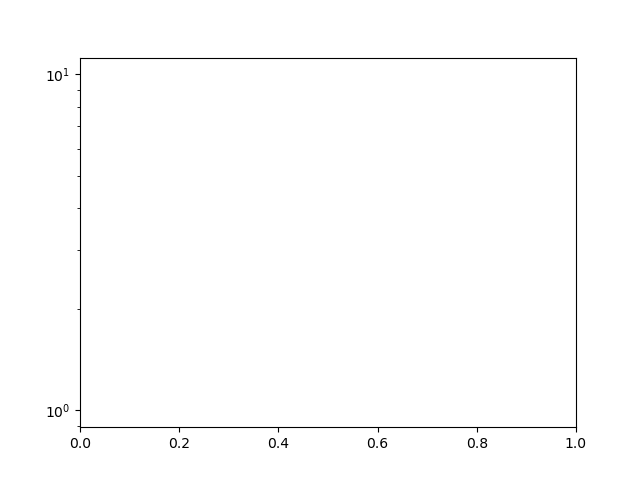

In [10]:
plt.figure()
plt.yscale('log')

In [5]:
config.optimizer.optimizer_type = OptimizerType.SGDARA
config.optimizer.lr = 1/2/ell/64
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         label="%s %s lr=%.e" % (config.optimizer.optimizer_type.value,
                                 config.optimizer.aggregation_options.aggregator_type.value,
                                 config.optimizer.lr))

Trying port 32046


In [ ]:
config.optimizer.optimizer_type = OptimizerType.SGDARA
config.optimizer.lr = 1/2/ell/128
config.optimizer.alpha = 0.5
record = train(config)
record.load_metrics()
plt.plot(record.metrics.num_grad, record.metrics.dist,
         label="%s %s lr=%.e" % (config.optimizer.optimizer_type.value,
                                 config.optimizer.aggregation_options.aggregator_type.value,
                                 config.optimizer.lr))

Trying port 25344


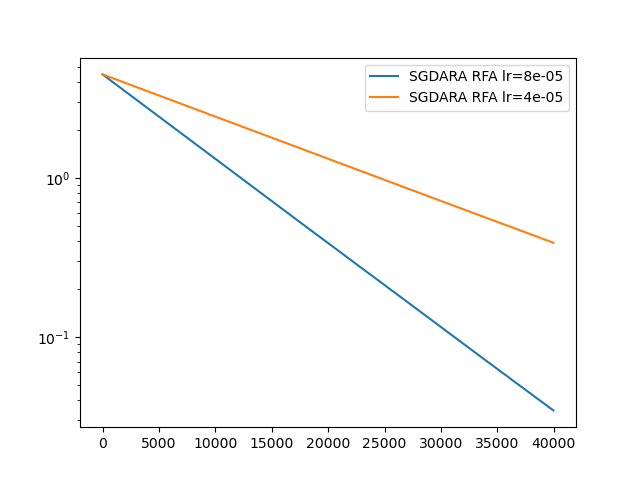

In [7]:
plt.legend()
plt.show()